In [3]:
from jetstream_hugo.jet_finding import *
from jetstream_hugo.definitions import *
from jetstream_hugo.plots import *
from jetstream_hugo.clustering import *
from jetstream_hugo.data import *
import colormaps

%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler

# jet finding v5 ?

## thetalev

In [2]:
ds = xr.Dataset()
ds["P"] = open_da("ERA5", "thetalev", "P", "6H", 1959, "JJA", -80, 20, 25, 75).load()
ds["u"] = open_da("ERA5", "thetalev", "u", "6H", 1959, "JJA", -80, 20, 25, 75).load()
ds["v"] = open_da("ERA5", "thetalev", "v", "6H", 1959, "JJA", -80, 20, 25, 75).load()
ds["s"] = open_da("ERA5", "thetalev", "s", "6H", 1959, "JJA", -80, 20, 25, 75).load()
ds["PV"] = open_da("ERA5", "thetalev", "PV", "6H", 1959, "JJA", -80, 20, 25, 75).load()

ds = compute_criterion(ds)

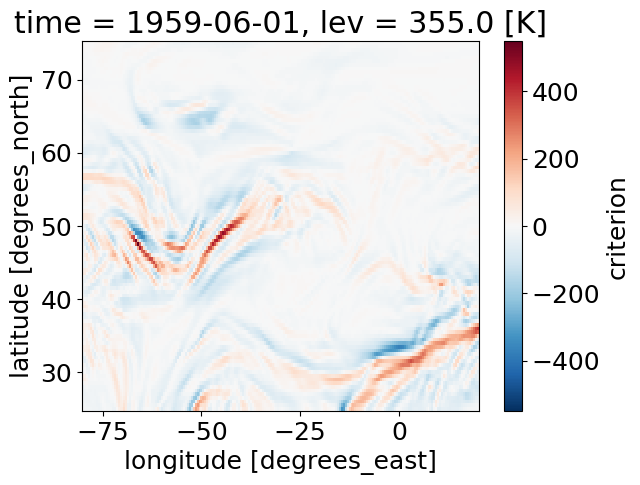

In [11]:
(-ds["criterion"][0, 0]).plot()

In [8]:
def mona_criterion(PV: xr.DataArray, cutoff: float = 0.4):
    criterion = smooth(PV, {"lon+lat": ("fft", 0.4)})
    criterion = np.log(criterion)
    criterion = criterion.differentiate("lon") ** 2 + criterion.differentiate("lat") ** 2
    return np.sqrt(criterion)

/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/xarray/core/computation.py:822: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


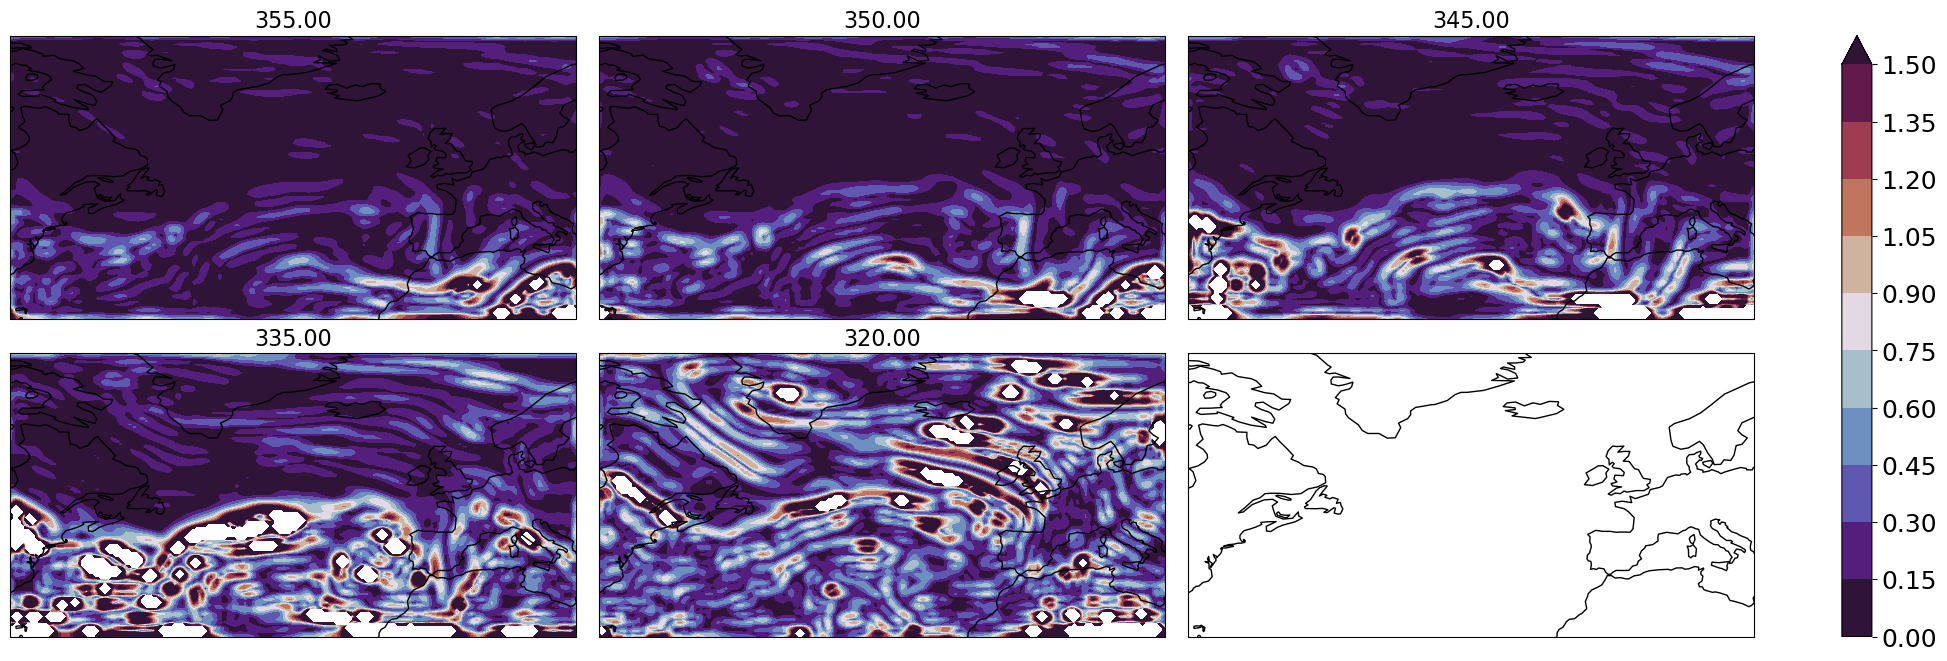

In [17]:
clu = Clusterplot(2, 3, get_region(ds["P"]))
_ = clu.add_contourf([mona_criterion(ds["PV"][100, itheta], cutoff=0.8) for itheta in range(5)], nlevels=11, q=0.95, titles=ds.lev.values)

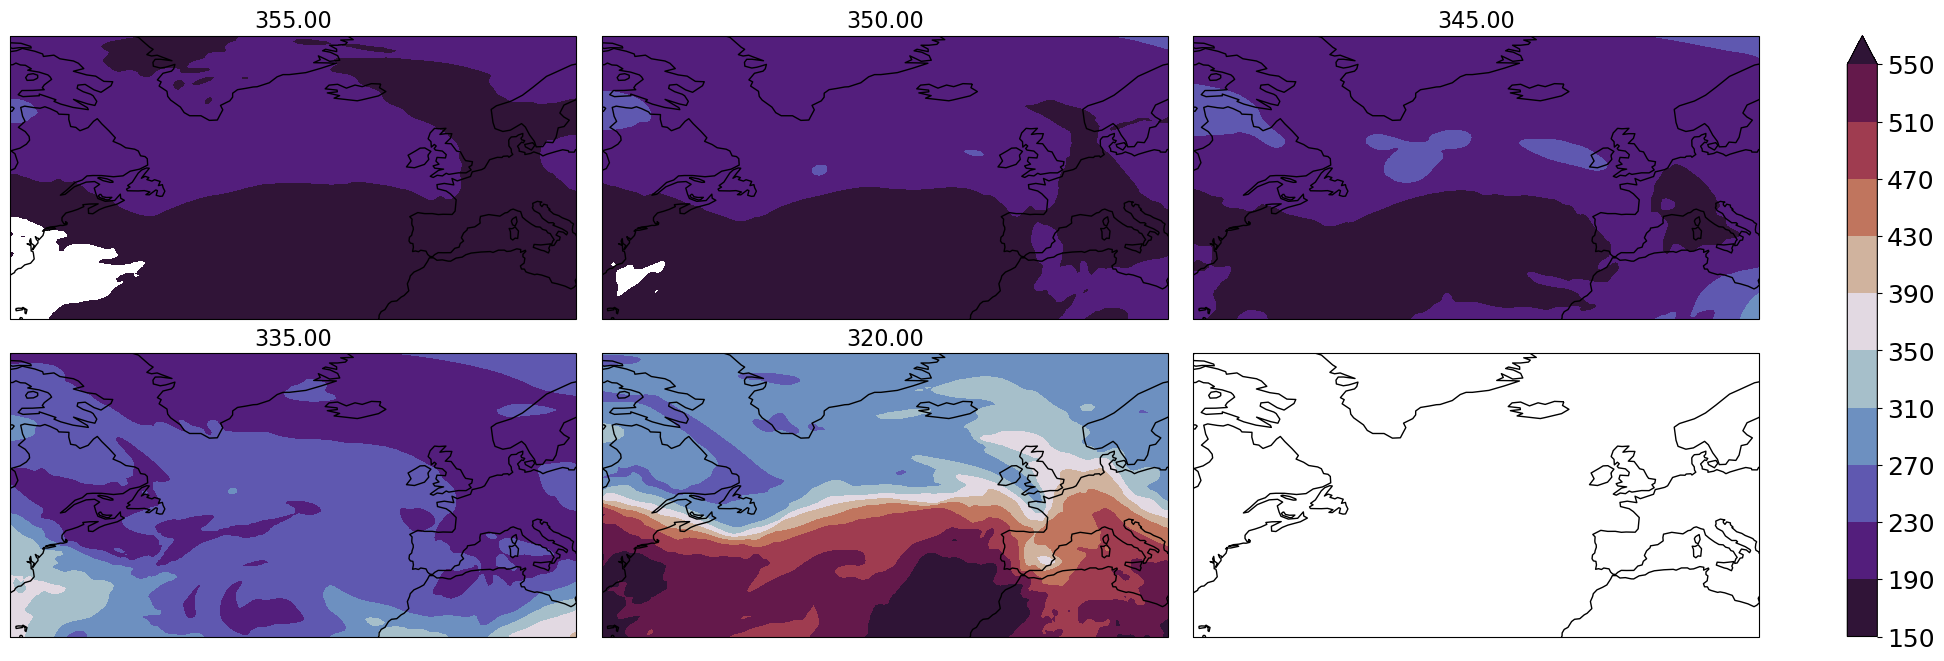

In [3]:
clu = Clusterplot(2, 3, get_region(ds["P"]))
_ = clu.add_contourf([ds["P"][100, itheta] for itheta in range(5)], nlevels=11, q=0.95, titles=ds.lev.values)

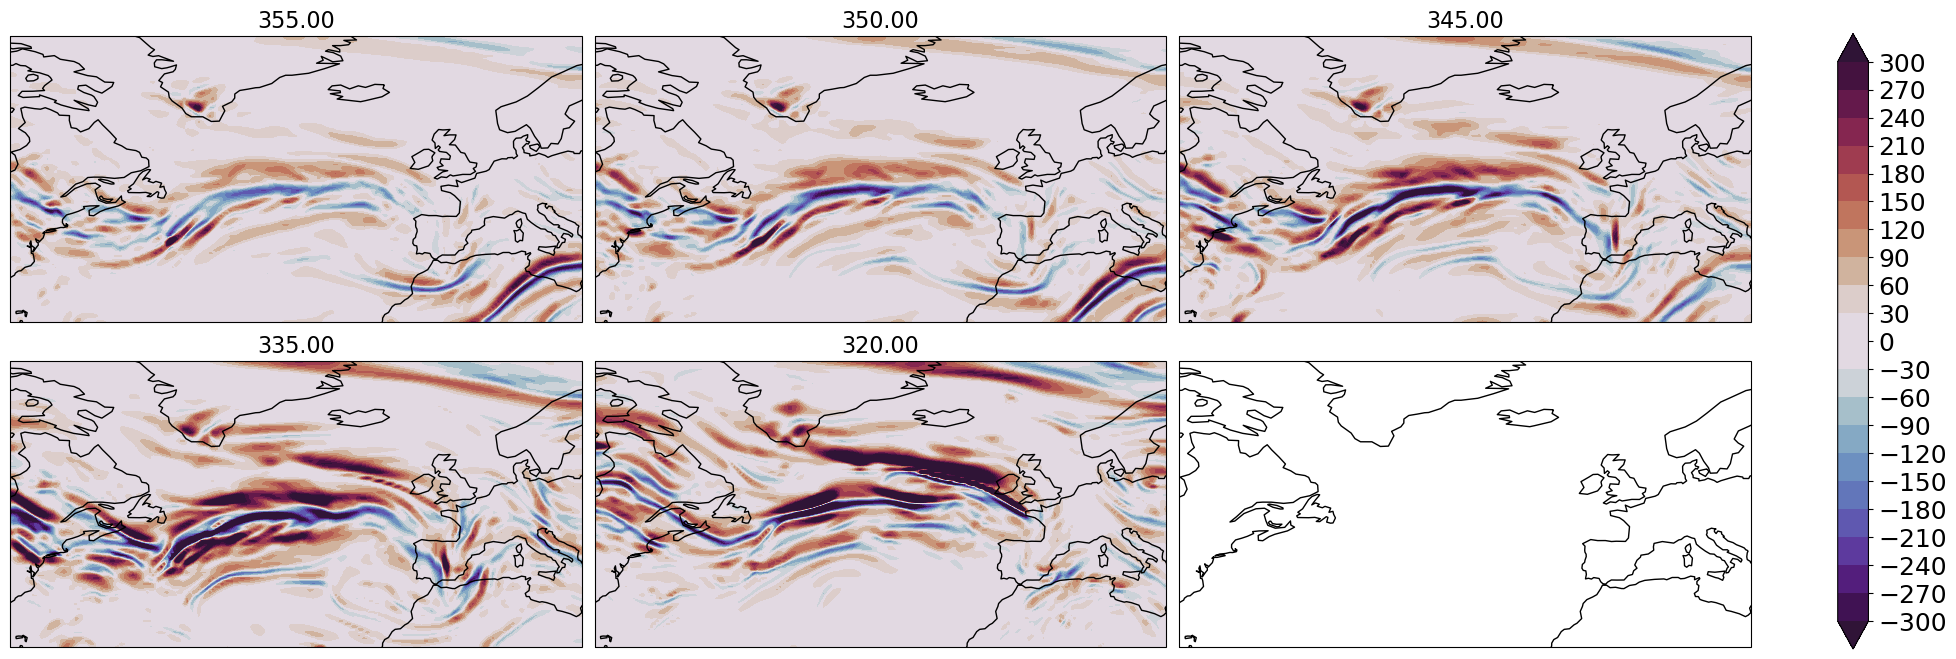

In [4]:
clu = Clusterplot(2, 3, get_region(ds["P"]))
_ = clu.add_contourf([ds["criterion"][100, itheta] for itheta in range(5)], nlevels=11, q=0.99, titles=ds.lev.values)

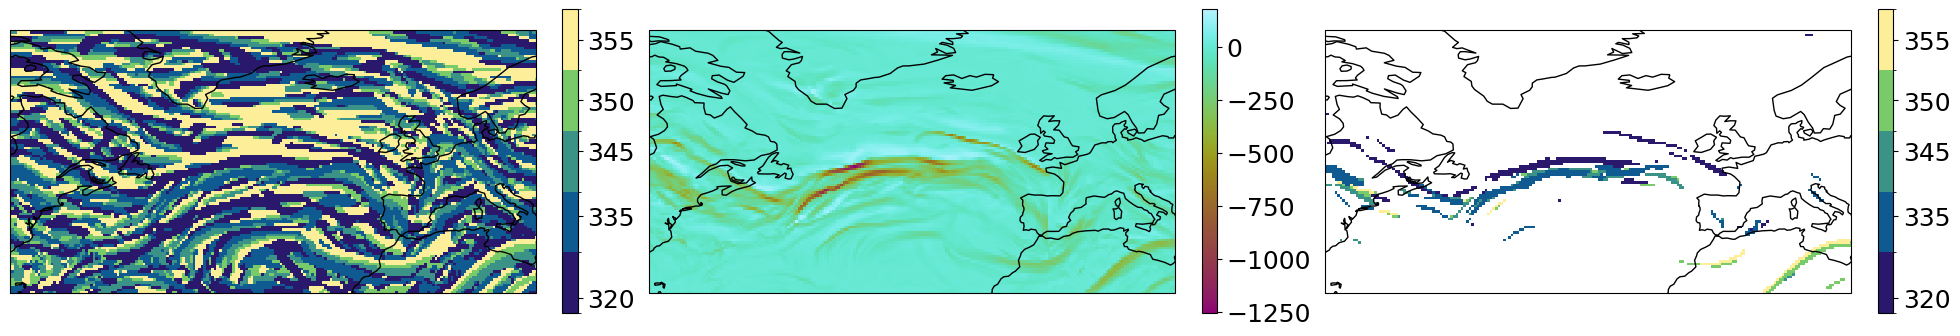

In [55]:
clu = Clusterplot(1, 3, get_region(ds))
lon, lat = ds.lon.values, ds.lat.values
to_plot = ds.lev[ds["criterion"][100, :].argmin(dim='lev')].values
cmap = colormaps.haline
ticks = np.unique(to_plot)
ticks2 = np.concatenate([[315], ticks, [360]]) 
norm = BoundaryNorm((ticks2[:-1] + ticks2[1:]) / 2, cmap.N)
im = clu.axes[0].pcolormesh(lon, lat, to_plot, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
clu.fig.colorbar(im, ax=clu.axes[0], ticks=ticks, spacing='uniform')
to_plot = ds["criterion"][100, :].min(dim='lev')
im = clu.axes[1].pcolormesh(lon, lat, to_plot.values, transform=ccrs.PlateCarree(), cmap=colormaps.hawaii)
clu.fig.colorbar(im, ax=clu.axes[1])
to_plot = ds.lev[ds["criterion"][100, :].argmin(dim='lev')].where(to_plot < -200).values
im = clu.axes[2].pcolormesh(lon, lat, to_plot, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
clu.fig.colorbar(im, ax=clu.axes[2], ticks=ticks, spacing='uniform')

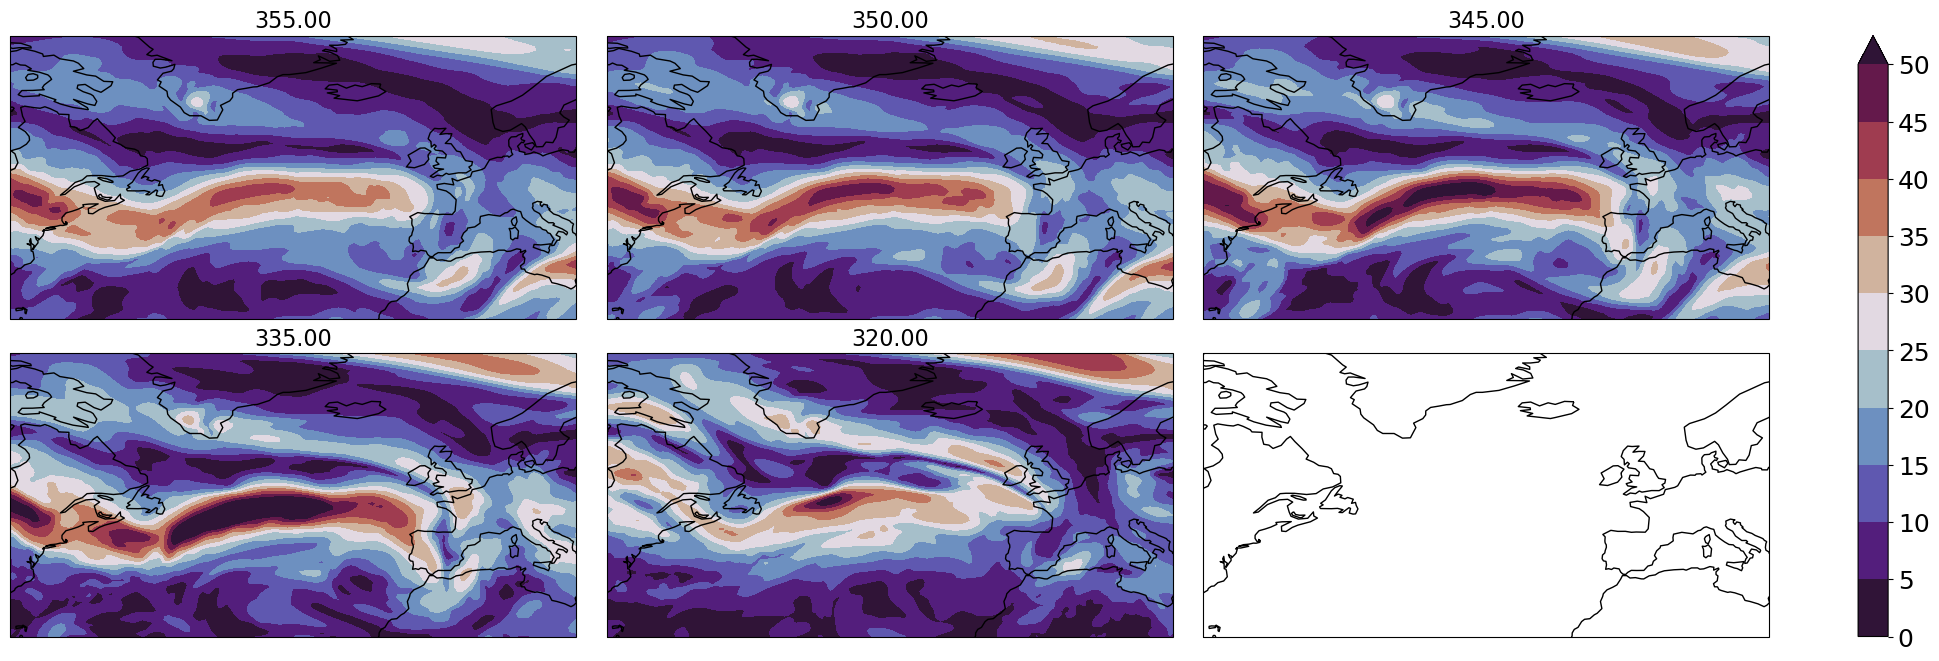

In [5]:
clu = Clusterplot(2, 3, get_region(ds["P"]))
_ = clu.add_contourf([ds["s"][100, itheta] for itheta in range(5)], nlevels=11, q=0.99, titles=ds.lev.values)

## plev, v6

In [4]:
ds = xr.open_dataset(f"{DATADIR}/ERA5/plev/usv1959JJA.nc").rename({
    "longitude": "lon",
    "latitude": "lat",
    "level": "lev",
})
ds = ds.reindex(lat=ds.lat[::-1])
ds["s"] = np.sqrt(ds["u"] ** 2 + ds["v"] ** 2)
for var in ds:
    ds[f"{var}_smo" ] = smooth(ds[var], {"lon+lat": ("fft", 0.3)})
ds = compute_criterion(ds)

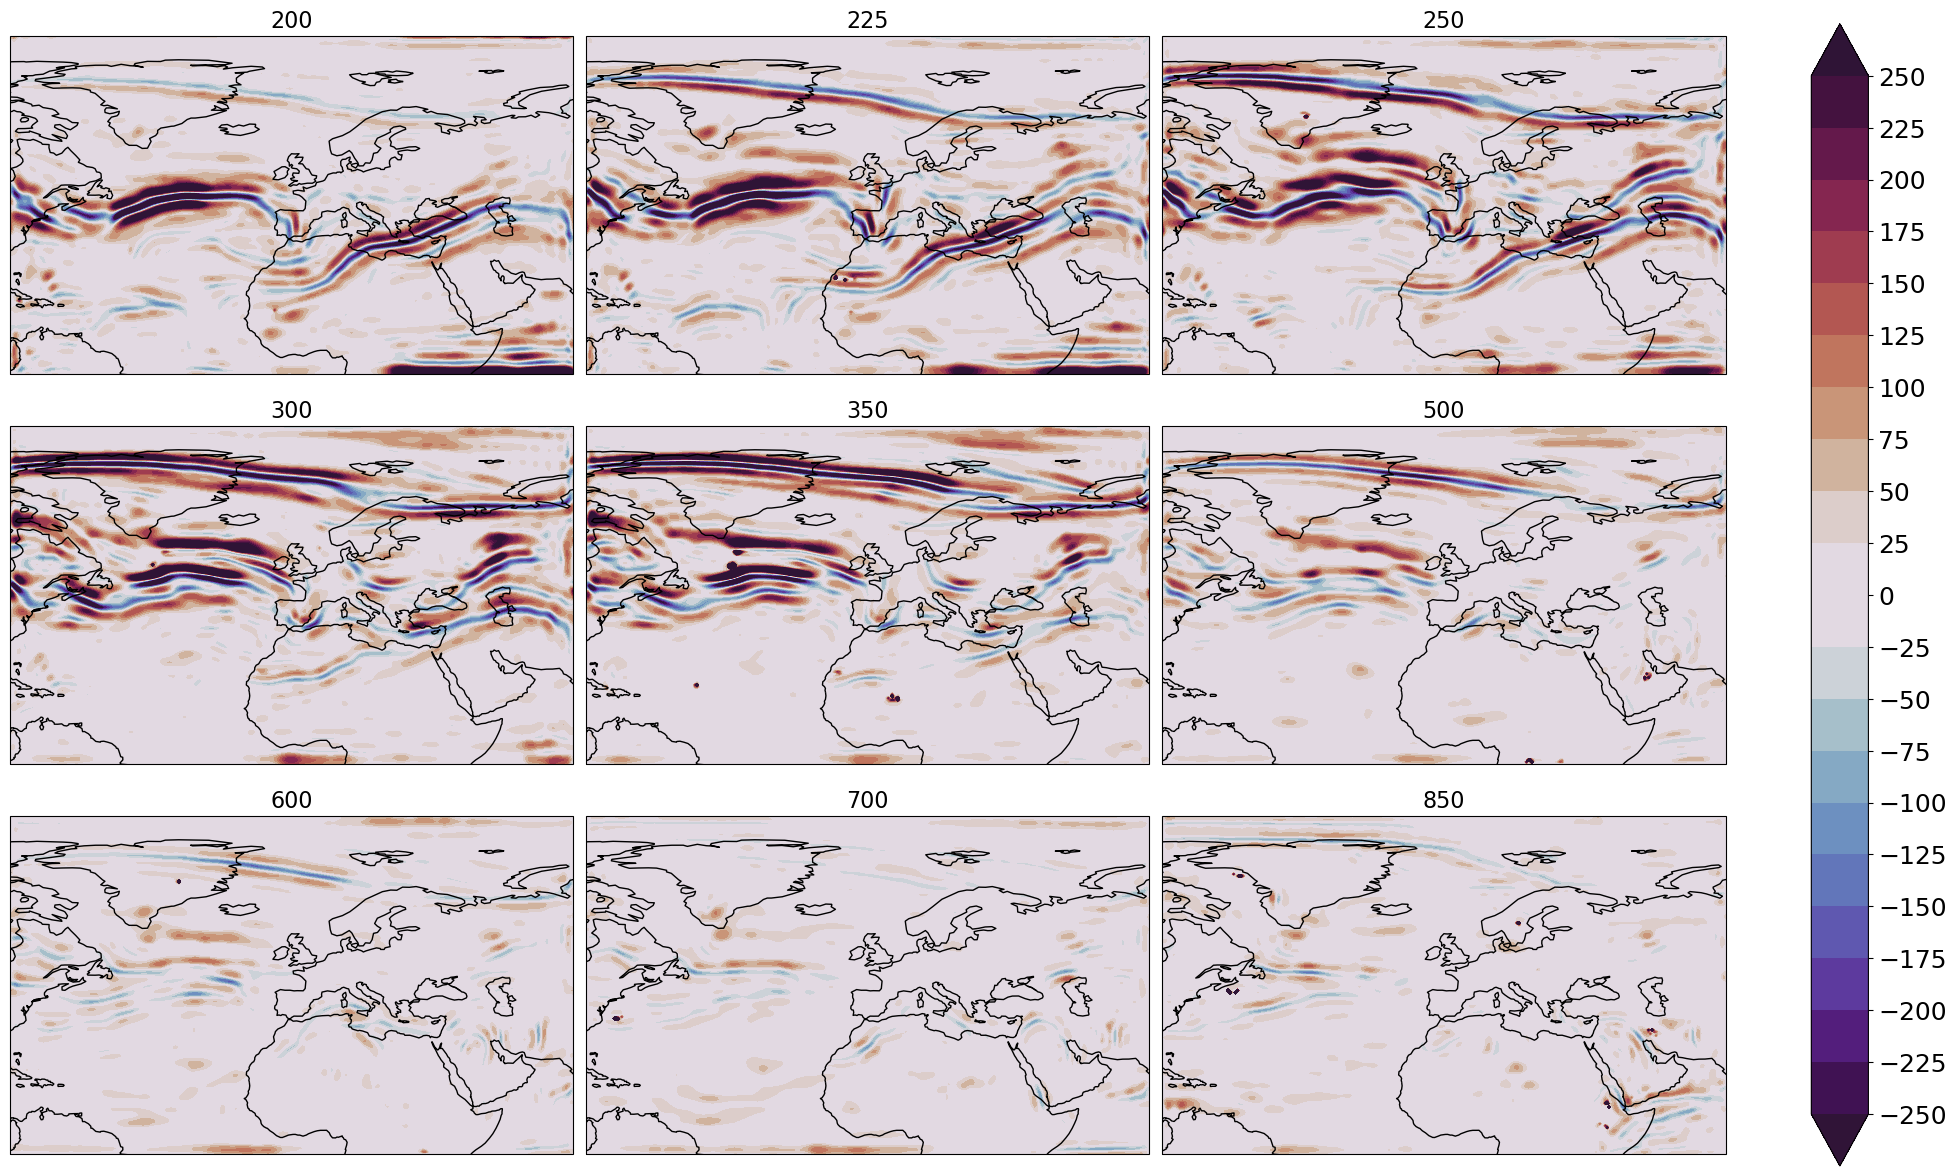

In [5]:
clu = Clusterplot(3, 3, get_region(ds))
_ = clu.add_contourf([ds["criterion"][100, ip_] for ip_ in range(9)], nlevels=11, q=0.99, titles=ds.lev.values)

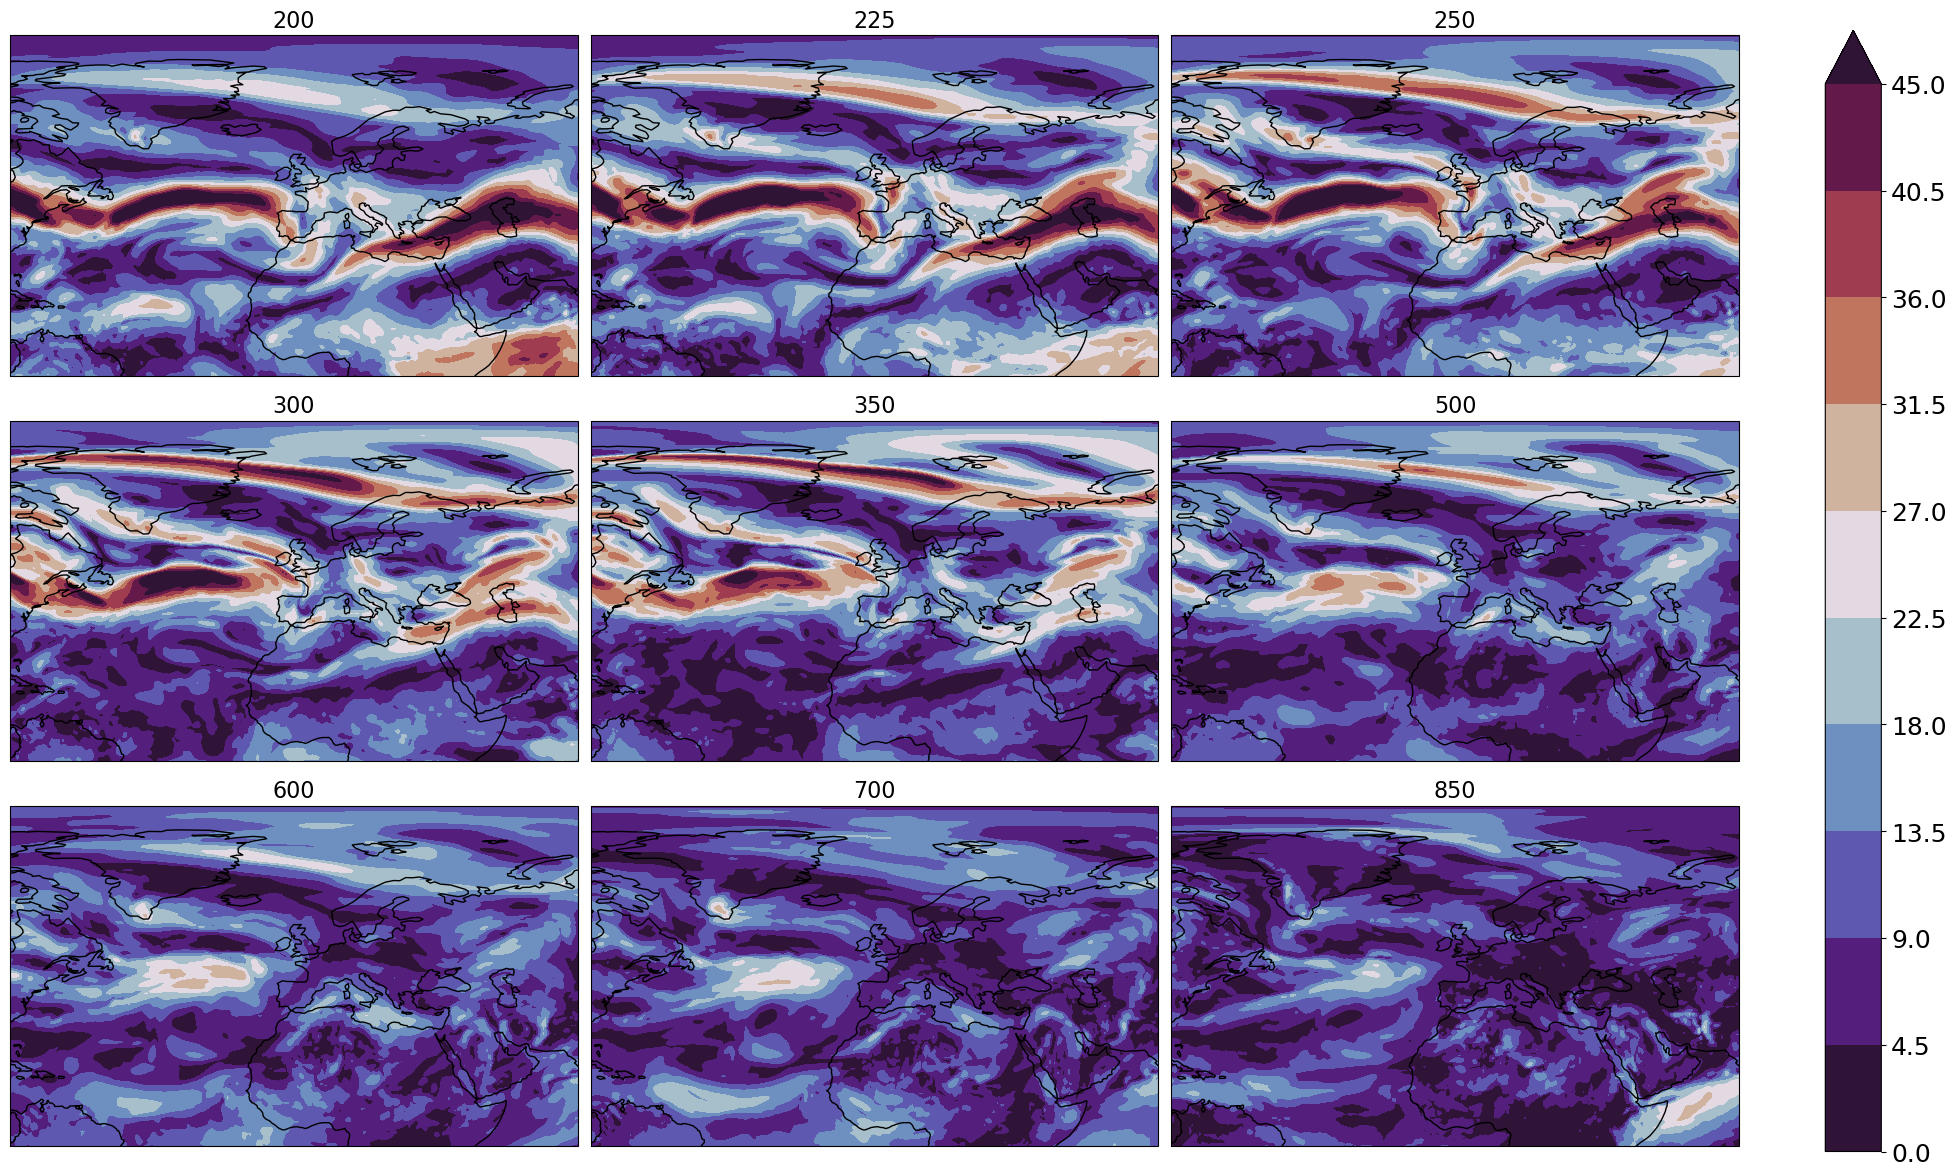

In [6]:
clu = Clusterplot(3, 3, get_region(ds))
_ = clu.add_contourf([ds["s"][100, ip_] for ip_ in range(9)], nlevels=11, q=0.99, titles=ds.lev.values)

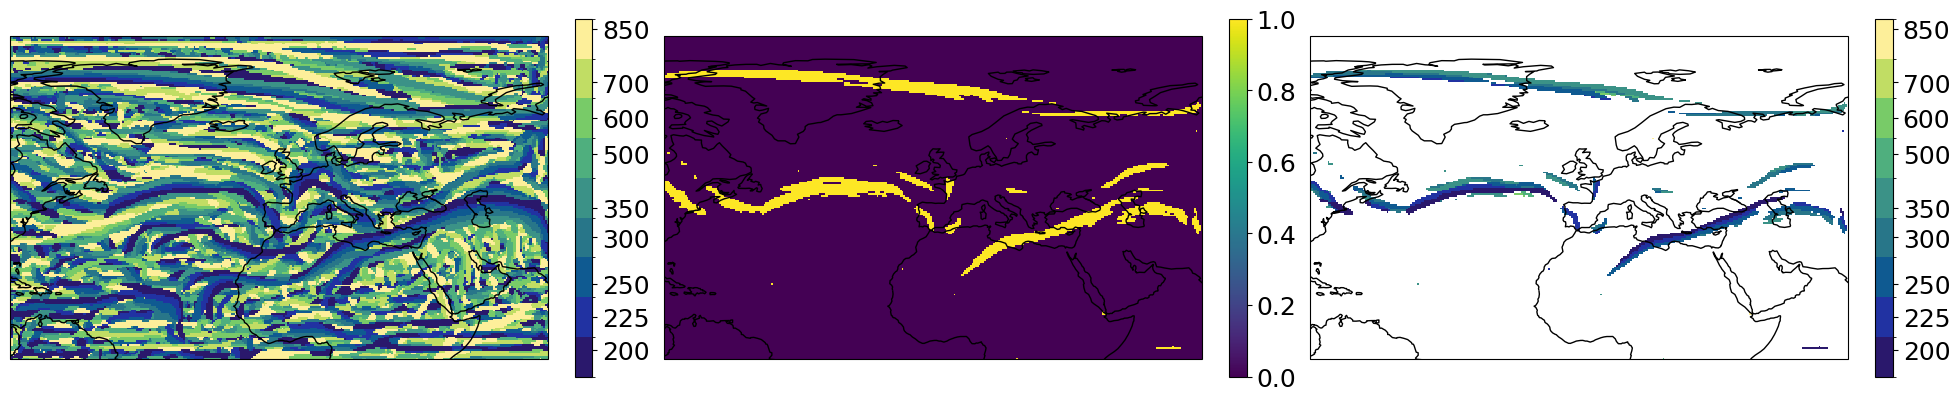

In [7]:
clu = Clusterplot(1, 3, get_region(ds))
lon, lat = ds.lon.values, ds.lat.values
to_plot = ds.lev[ds["criterion"][100, :].argmin(dim='lev')].values
cmap = colormaps.haline
ticks = np.unique(to_plot)
ticks2 = np.concatenate([[150], ticks, [900]]) 
norm = BoundaryNorm((ticks2[:-1] + ticks2[1:]) / 2, cmap.N)
im = clu.axes[0].pcolormesh(lon, lat, to_plot, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
clu.fig.colorbar(im, ax=clu.axes[0], ticks=ticks, spacing='uniform')
to_plot = ds["criterion"][100, :].min(dim='lev')
im = clu.axes[1].pcolormesh(lon, lat, to_plot.values < -150, transform=ccrs.PlateCarree())
clu.fig.colorbar(im, ax=clu.axes[1])
to_plot = ds.lev[ds["criterion"][100, :].argmin(dim='lev')].where(to_plot < -150).values
im = clu.axes[2].pcolormesh(lon, lat, to_plot, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
clu.fig.colorbar(im, ax=clu.axes[2], ticks=ticks, spacing='uniform')

In [8]:
lon, lat = ds.lon.values, ds.lat.values
maxlev = ds["criterion"][0].argmin(dim="lev")
append_to_groups = [ds["s"][0]]
append_to_groups = [atg.isel(lev=maxlev) for atg in append_to_groups]
append_to_groups.append(ds["criterion"][0].lev[maxlev])
criterion = ds["criterion"][0].isel(lev=maxlev)
X = ds["criterion"][0].values
idxs = np.where(X < -150)
append_names = [atg.name for atg in append_to_groups]
append_to_groups = [atg.values[idxs[0], idxs[1]] for atg in append_to_groups]
points = np.asarray([lon[idxs[1]], lat[idxs[0]], *append_to_groups]).T
points = pd.DataFrame(points, columns=["lon", "lat", *append_names])
points.iloc[np.ones(len(points), dtype=bool)]

lon  lat         s    lev
0    -66.5  0.0  7.184317  600.0
1    -66.5  0.0  7.184317  600.0
2    -66.5  0.0  7.184317  600.0
3    -66.5  0.0  7.184317  600.0
4    -66.5  0.0  7.184317  600.0
...    ...  ...       ...    ...
7483 -23.0  3.5  9.318861  700.0
7484 -23.0  3.5  9.318861  700.0
7485 -30.5  4.0  8.579989  300.0
7486 -27.5  4.0  9.335428  600.0
7487 -27.5  4.0  9.335428  600.0

[7488 rows x 4 columns]

In [9]:
thisds = ds.loc[dict(time=ds.time[0].values)]
indexer = points
cols = [col for col in ["lev", "lon", "lat"] if col in indexer]
kwargs = {col: xr.DataArray(indexer[col].to_numpy(), dims="point") for col in cols}
thisds["s"].loc[kwargs]

<xarray.DataArray 's' (point: 7488)>
array([7.18432, 7.18432, 7.18432, ..., 8.57999, 9.33543, 9.33543],
      dtype=float32)
Coordinates:
    lon      (point) float32 -66.5 -66.5 -66.5 -66.5 ... -23.0 -30.5 -27.5 -27.5
    lat      (point) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 3.5 3.5 3.5 4.0 4.0 4.0
    lev      (point) int32 600 600 600 600 600 600 ... 700 700 700 300 600 600
    time     datetime64[ns] 1959-06-01
Dimensions without coordinates: point

In [13]:
ds["s"][0].isel(lev=maxlev)

<xarray.DataArray 's' (lat: 181, lon: 301)>
array([[7.74886, 6.7384 , 6.83476, ..., 8.63268, 1.34417, 4.1188 ],
       [3.50887, 7.10968, 4.52787, ..., 1.52373, 1.75193, 7.77564],
       [4.96703, 1.42063, 1.26403, ..., 2.15626, 2.32916, 7.37162],
       ...,
       [8.48636, 5.71558, 5.71365, ..., 2.10559, 2.11525, 8.76879],
       [2.74663, 5.90244, 5.89979, ..., 4.14373, 4.14231, 2.31312],
       [0.00196, 0.00127, 0.00127, ..., 0.00196, 0.00196, 0.00196]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -80.0 -79.5 -79.0 -78.5 -78.0 ... 68.5 69.0 69.5 70.0
  * lat      (lat) float32 0.0 0.5 1.0 1.5 2.0 2.5 ... 88.0 88.5 89.0 89.5 90.0
    lev      (lat, lon) int32 600 600 600 600 600 600 ... 225 225 225 225 225
    time     datetime64[ns] 1959-06-01

## 2PVU

In [112]:
ds_2PVU = xr.Dataset()
ds_2PVU['u'] = open_da("ERA5", "2PVU", "u", "6H", 1959, "JJA", -80, 20, 25, 75).load()
mask_valid = ds_2PVU['u'] > -120
ds_2PVU['u'] = ds_2PVU['u'].where(mask_valid, 0)
ds_2PVU['v'] = open_da("ERA5", "2PVU", "v", "6H", 1959, "JJA", -80, 20, 25, 75).load().where(mask_valid, 0)
ds_2PVU['s'] = open_da("ERA5", "2PVU", "s", "6H", 1959, "JJA", -80, 20, 25, 75).load().where(mask_valid, 0)
ds_2PVU['theta'] = open_da("ERA5", "2PVU", "theta", "6H", 1959, "JJA", -80, 20, 25, 75).load().where(mask_valid, 0)
ds_2PVU['P'] = open_da("ERA5", "2PVU", "P", "6H", 1959, "JJA", -80, 20, 25, 75).load().where(mask_valid, 0)
ds_2PVU = compute_criterion(ds_2PVU)

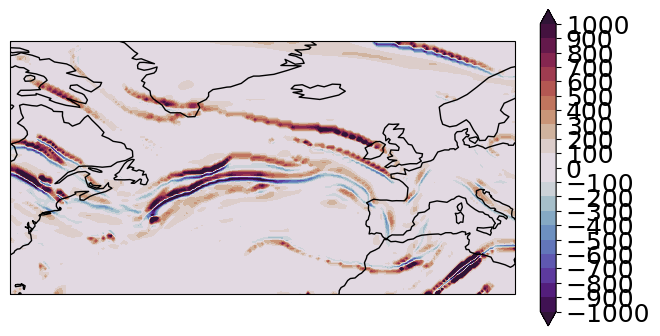

In [113]:
clu = Clusterplot(1, 1, get_region(ds_2PVU))
_ = clu.add_contourf([ds_2PVU["criterion"][100]], nlevels=11, q=0.99)

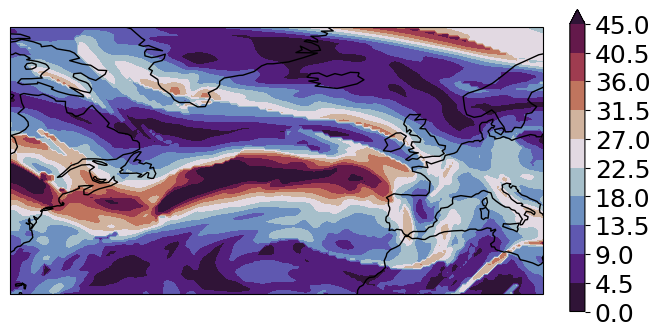

In [118]:
clu = Clusterplot(1, 1, get_region(ds_2PVU))
_ = clu.add_contourf([ds_2PVU["s"][100]], nlevels=11, q=0.96)

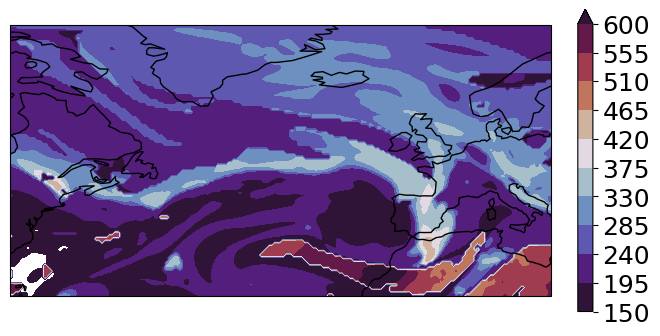

In [114]:
clu = Clusterplot(1, 1, get_region(ds_2PVU))
_ = clu.add_contourf([ds_2PVU["P"][100]], nlevels=11, q=0.99)

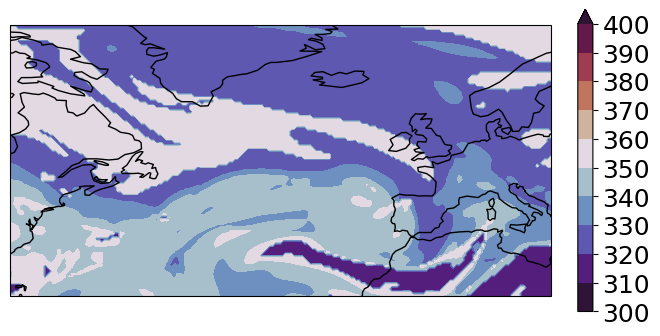

In [115]:
clu = Clusterplot(1, 1, get_region(ds_2PVU))
_ = clu.add_contourf([ds_2PVU["theta"][100]], nlevels=11, q=0.99)

In [ ]:
preprocess = default_preprocess
define_blobs = partial(define_blobs_wind_speed, min_size=750)
refine_jets = partial(refine_jets_shortest_path, compute_weights=compute_weights_wind_speed, jet_cutoff=2.4e3)
jet_finder = JetFinder(
    preprocess=preprocess, define_blobs=define_blobs, refine_jets=refine_jets
)
find_all_jets(jet_finder, ds, 14, 10)

In [13]:
thisds = ds.isel(time=it)
preprocess = partial(smooth, smooth_map={"lon+lat": ("fft", 0.4)})
for varname in ['u', 'v', 's']:
    thisds[f'{varname}_smo'] = preprocess(thisds[varname])
%lprun -f define_blobs_generic define_blobs_generic(thisds["s"], thisds["s"], criterion_threshold=30, distance_function=my_pairwise, min_size=750)
it = it + 1

Timer unit: 1e-09 s

Total time: 0.207846 s
File: /storage/homefs/hb22g102/jetstream_hugo/src/jetstream_hugo/jet_finding.py
Function: define_blobs_generic at line 81

Line #      Hits         Time  Per Hit   % Time  Line Contents
    81                                           def define_blobs_generic(
    82                                               criterion: xr.DataArray,
    83                                               *append_to_groups: xr.DataArray,
    84                                               criterion_threshold: float = 0,
    85                                               distance_function: Callable = pairwise_distances,
    86                                               distance_threshold: float = 0.75,
    87                                               min_size: int = 50,
    88                                           ) -> Tuple[list, list]:
    89         1      95169.0  95169.0      0.0      lon, lat = criterion.lon.values, criterion.lat.values
   

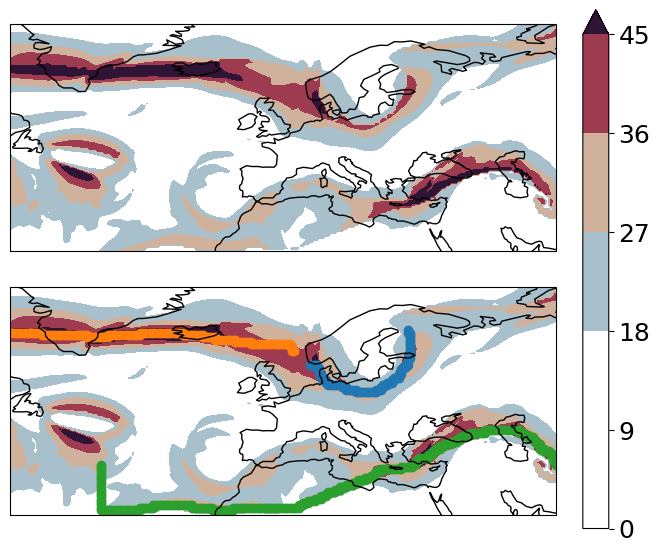

In [15]:
clu = Clusterplot(2, 1, get_region(ds))
it = 60
clu.add_contourf([ds['s'][it], ds['s'][it]], transparify=2, q=0.95)
ax = clu.axes[1]
for jet in all_jets[it]:
    if np.sum(jet[:, 2]) > 1:
        ax.scatter(*jet[:, :2].T)

# the rest

In [8]:
exp_s = Experiment(
    "ERA5", "plev", "s", "6H", (1940, 2023), [5, 6, 7, 8, 9], -60, 70, 25, 85, 250, None, None, None
)
da_s = exp_s.da
exp_pvs= Experiment(
    "ERA5", "surf", "pvs", "6H", "all", [5, 6, 7, 8, 9], -60, 70, 25, 85, 250, 'hourofyear', {'hourofyear': ('win', 4 * 10)}, None
)
da_pvs = exp_pvs.da
exp_s_low = Experiment(
    "ERA5", "plev", "s", "6H", (1940, 2023), [5, 6, 7, 8, 9], -60, 70, 25, 85, 700, None, None, None
)
exp_T = Experiment(
    "ERA5", "surf", "t", "6H", (1940, 2023), [5, 6, 7, 8, 9], -30, 40, 30, 75, 250, 'hourofyear', {'hourofyear': ('win', 4 * 10)}, None,
)
da_T = exp_T.da

In [9]:
(
    all_jets,
    where_are_jets,
    all_jets_one_array,
    all_jets_over_time,
    flags,
) = exp_s.track_jets()
flags = xr.DataArray(
    flags, coords=dict(time=da_s.time.values, jet=np.arange(flags.shape[1]))
)
props_as_ds_uncat = exp_s.props_as_ds(categorize=False)
props_as_ds_uncat = better_is_polar(all_jets, props_as_ds_uncat, exp_s_low.path)
props_as_ds = categorize_ds_jets(props_as_ds_uncat)
props_as_np = props_to_np(props_as_ds)
props_as_ds_anoms = compute_prop_anomalies(props_as_ds)
props_as_ds["exists"] = (~props_as_ds["mean_lon"].isnull()).astype(np.float32)
normalize = lambda da: (da - da.mean(axis=0)) / da.std(axis=0)
overlaps, vert_dists = compute_all_overlaps(all_jets, props_as_ds_uncat)
da_overlaps, da_vert_dists = overlaps_vert_dists_as_da(
    da_s, all_jets, props_as_ds_uncat, exp_s.path
)
props_as_ds["overlap"] = (da_overlaps > 0).mean(dim="lon")
props_as_ds["vert_dist"] = da_vert_dists.mean(dim="lon")
nao_summer = get_nao(da_s)
props_as_ds["nao"] = nao_summer

100%|██████████| 51408/51408 [00:24<00:00, 2083.84it/s]


## Better is_polar (WIP)

In [ ]:
from sklearn.cluster import HDBSCAN, DBSCAN, KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture


def to_zero_one(x):
    return (x - x.min()) / (x.max() - x.min())


props_as_ds_uncat["int_ratio"] = props_as_ds_uncat["int_low"] / props_as_ds_uncat["int"]
Lat = props_as_ds_uncat["mean_lat"].values
mask = ~np.isnan(Lat)
Lat = Lat[mask]
feature_names = ["mean_lon", "mean_lat", "int_ratio", "Spe"]
X = []
indices = np.random.randint(0, len(Lat), size=10000)
for feature_name in feature_names:
    X.append(props_as_ds_uncat[feature_name].values[mask])
X = np.stack(X).T

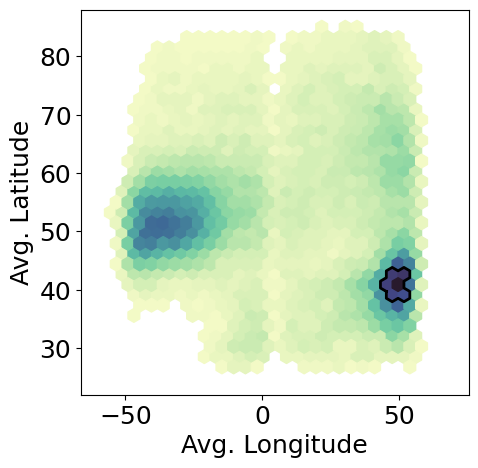

In [ ]:
from shapely.geometry import Polygon
from shapely.ops import unary_union
from shapely import set_precision

fig, ax = plt.subplots(figsize=(5, 5))
feature_ind = [0, 1]
cmap = make_transparent(colormaps.deep, nlev=100, n_transparent=2)
im = ax.hexbin(*X[:, feature_ind].T, gridsize=30, cmap=cmap)
ax.set_xlabel(PRETTIER_VARNAME[feature_names[feature_ind[0]]])
ax.set_ylabel(PRETTIER_VARNAME[feature_names[feature_ind[1]]])
offsets = im.get_offsets()
counts = im.get_array()
which = counts > 0.7 * counts.max()

hex_poly = im.get_paths()[0].vertices
hex_array = []
for offs in offsets[which]:
    hex_array.append(set_precision(Polygon(hex_poly + offs[None, :]), 0.0001))
polygon = unary_union(hex_array)
try:
    plt.plot(*polygon.boundary.xy, color="black", lw=2)
except NotImplementedError:
    for geom in polygon.geoms:
        plt.plot(*geom.boundary.xy, color="black", lw=2)

## Trends

In [10]:
from numpy.polynomial import Polynomial


def p_to_tex(p: Polynomial) -> str:
    coef1 = num2tex(p.coef[1])
    coef0 = num2tex(p.coef[0])
    sign = "+" if np.sign(p.coef[0]) else "-"
    string = f"$y={coef1}\cdot x {sign} {coef0}$"
    return string

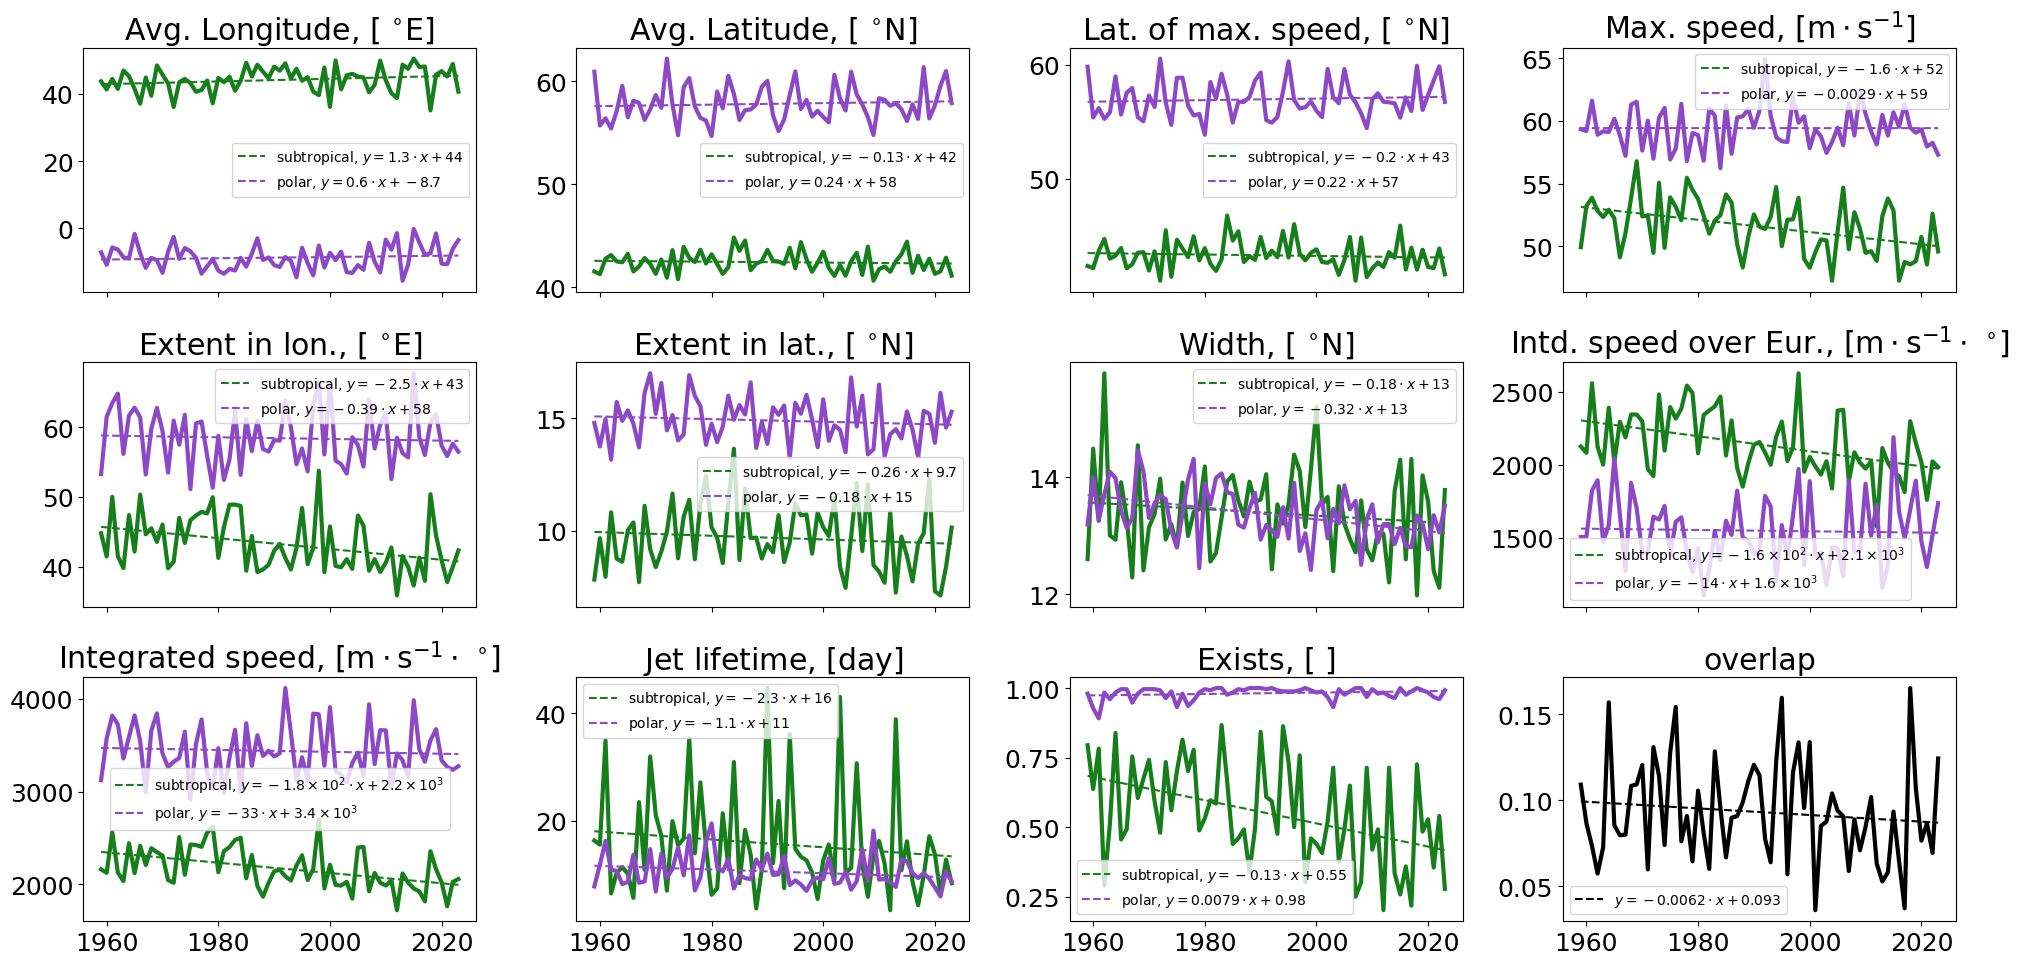

In [11]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10), tight_layout=True, sharex="all")
axes = axes.flatten()
high_summer_mask = np.isin(props_as_ds.time.dt.month.values, [7, 8])
props_as_ds_yearly_hs = (
    props_as_ds.sel(time=high_summer_mask).resample(time="1Y").mean()
)
time_mask = (props_as_ds_yearly_hs.time.dt.year >= 1959).values
time_mask = time_mask
x = props_as_ds_yearly_hs.time[time_mask].dt.year.values
data_vars = [
    varname
    for varname in props_as_ds_yearly_hs.data_vars
    if varname
    not in ["int_low", "is_polar", "Lon", "tilt", "sinuosity", "vert_dist", "nao"]
]
for i, (varname, ax) in enumerate(zip(data_vars, axes)):
    for j, jet in enumerate(["subtropical", "polar"]):
        try:
            ax.set_title(f"{PRETTIER_VARNAME[varname]}, [{UNITS[varname]}]")
        except KeyError:
            ax.set_title(varname)
        try:
            this_da = props_as_ds_yearly_hs[varname].sel(jet=jet)[time_mask]
            ax.plot(x, this_da.values, lw=3, color=COLORS5[j])
            p = Polynomial.fit(x, this_da.values, deg=1)
            ax.plot(
                x,
                p(x),
                lw=1.5,
                color=COLORS5[j],
                ls="dashed",
                label=f"{jet}, {p_to_tex(p)}",
            )
        except KeyError:
            this_da = props_as_ds_yearly_hs[varname][time_mask]
            ax.plot(x, this_da.values, lw=3, color="black")
            p = Polynomial.fit(x, this_da.values, deg=1)
            ax.plot(x, p(x), lw=1.5, color="black", ls="dashed", label=f"{p_to_tex(p)}")
            break
    ax.legend(ncol=1, fontsize=10)
fig.savefig(f"{FIGURES}/jet_props_misc/jet_props_yearly_trends_post_1959.png")

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10), tight_layout=True, sharex="all")
axes = axes.flatten()
high_summer_mask = np.isin(props_as_ds.time.dt.month.values, [7, 8])
props_as_ds_yearly_hs = (
    props_as_ds.sel(time=high_summer_mask).resample(time="1Y").mean()
)
time_mask = (props_as_ds_yearly_hs.time.dt.year >= 1959).values
time_mask = time_mask
x = props_as_ds_yearly_hs.time[time_mask].dt.year.values
data_vars = [
    varname
    for varname in props_as_ds_yearly_hs.data_vars
    if varname
    not in ["int_low", "is_polar", "Lon", "tilt", "sinuosity", "vert_dist", "nao"]
]
for i, (varname, ax) in enumerate(zip(data_vars, axes)):
    for j, jet in enumerate(["subtropical", "polar"]):
        try:
            ax.set_title(f"{PRETTIER_VARNAME[varname]}, [{UNITS[varname]}]")
        except KeyError:
            ax.set_title(varname)
        try:
            this_da = props_as_ds_yearly_hs[varname].sel(jet=jet)[time_mask]
            ax.plot(x, this_da.values, lw=3, color=COLORS5[j])
            p = Polynomial.fit(x, this_da.values, deg=1)
            ax.plot(
                x,
                p(x),
                lw=1.5,
                color=COLORS5[j],
                ls="dashed",
                label=f"{jet}, {p_to_tex(p)}",
            )
        except KeyError:
            this_da = props_as_ds_yearly_hs[varname][time_mask]
            ax.plot(x, this_da.values, lw=3, color="black")
            p = Polynomial.fit(x, this_da.values, deg=1)
            ax.plot(x, p(x), lw=1.5, color="black", ls="dashed", label=f"{p_to_tex(p)}")
            break
    ax.legend(ncol=1, fontsize=10)
fig.savefig(f"{FIGURES}/jet_props_misc/jet_props_yearly_trends_post_1959.png")

[[ 1.       0.41002  0.06818]
 [ 0.41002  1.      -0.18765]
 [ 0.06818 -0.18765  1.     ]]


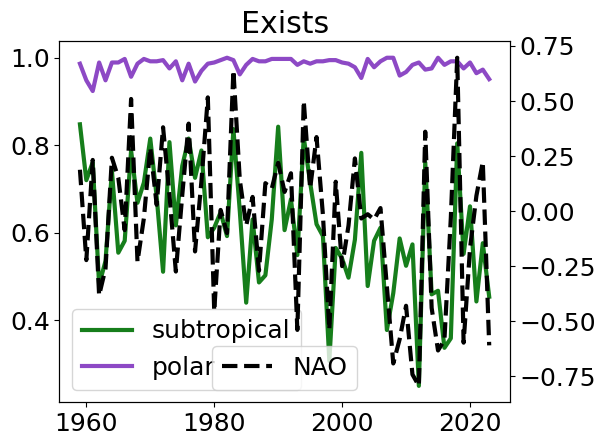

In [ ]:
high_summer_mask = np.isin(props_as_ds.time.dt.month.values, [7, 8])
this_props_as_ds = props_as_ds.sel(time=high_summer_mask).resample(time="1M").mean()
corr_time_mask = ~this_props_as_ds["nao"].isnull()
corrs = np.corrcoef(
    np.stack(
        [
            this_props_as_ds["nao"][corr_time_mask].values,
            this_props_as_ds["exists"][corr_time_mask, 0].values,
            this_props_as_ds["exists"][corr_time_mask, 1].values,
        ]
    )
)
fig, ax = plt.subplots(tight_layout=True)
varname = "exists"
for j, jet in enumerate(["subtropical", "polar"]):
    ax.set_title(f"{PRETTIER_VARNAME[varname]}")
    this_da = props_as_ds_yearly_hs[varname].sel(jet=jet)[time_mask]
    ax.plot(x, this_da.values, lw=3, color=COLORS5[j], label=jet)
twinax = ax.twinx()
twinax.plot(
    x,
    props_as_ds_yearly_hs["nao"][time_mask],
    lw=3,
    color="black",
    label="NAO",
    ls="dashed",
)
ax.legend().set_zorder(102)
twinax.legend(loc="lower center")
print(corrs)

## Correlations

In [ ]:
props_as_ds_late = props_as_ds.sel(time=props_as_ds.time.dt.year >= 1959)
props_as_ds_late["anti_pv_activity"] = (
    "time",
    ds_pvs["anti"].sum(dim=["lon", "lat"]).values,
)
props_as_ds_late["cycl_pv_activity"] = (
    "time",
    ds_pvs["cycl"].sum(dim=["lon", "lat"]).values,
)
props_as_ds_late["nao"] = nao_summer.sel(time=nao_summer.time.dt.year >= 1959)
props_as_ds_late["n_jets"] = (~props_as_ds_uncat["mean_lat"].isnull()).sum(dim="jet")

/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


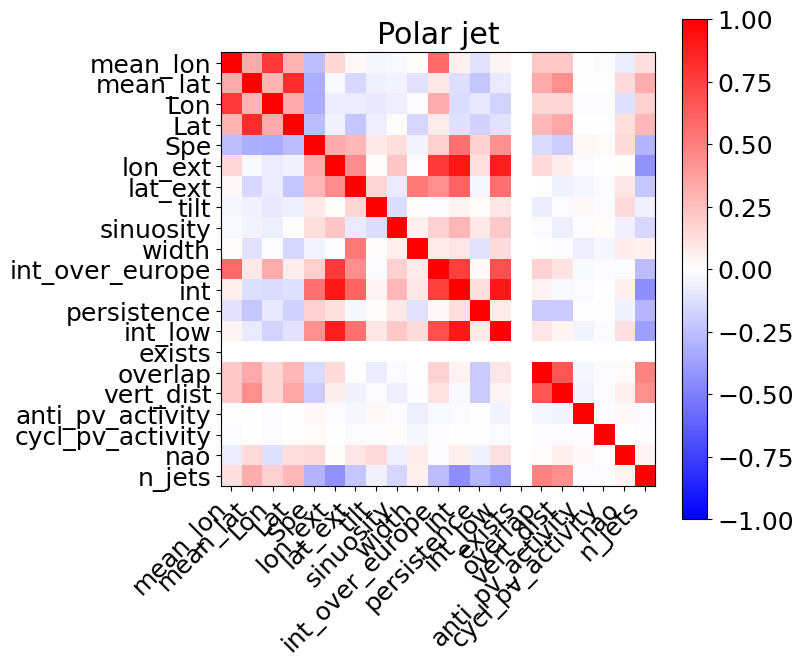

In [ ]:
to_concat = []
polar_valids = ~props_as_ds_late["mean_lon"].sel(jet="polar").isnull().values
for varname, da in props_as_ds_late.items():
    if varname not in [
        "anti_pv_activity",
        "cycl_pv_activity",
        "overlap",
        "vert_dist",
        "n_jets",
        "nao",
    ]:
        to_concat.append(da.sel(jet="polar").values[polar_valids])
    else:
        to_concat.append(da.fillna(0).values[polar_valids])
fig, ax = plt.subplots(figsize=(7, 6.5))
im = plt.imshow(np.corrcoef(np.stack(to_concat)), vmin=-1, vmax=1, cmap="bwr")
plt.colorbar(im)
ax.set_yticks(np.arange(0, len(props_as_ds_late.data_vars)), props_as_ds_late.data_vars)
_ = ax.set_xticks(
    np.arange(0, len(props_as_ds_late.data_vars)),
    props_as_ds_late.data_vars,
    rotation=45,
    ha="right",
)
ax.set_title("Polar jet")
fig.savefig(f"{FIGURES}/jet_props_misc/jet_props_corr_polar.png")

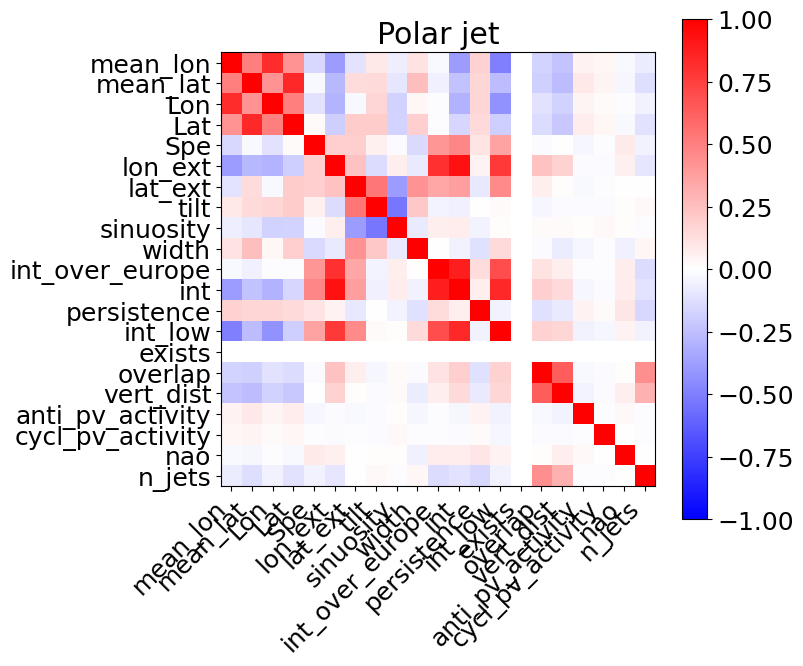

In [ ]:
to_concat = []
polar_valids = ~props_as_ds_late["mean_lon"].sel(jet="subtropical").isnull().values
for varname, da in props_as_ds_late.items():
    if varname not in [
        "anti_pv_activity",
        "cycl_pv_activity",
        "overlap",
        "vert_dist",
        "n_jets",
        "nao",
    ]:
        to_concat.append(da.sel(jet="subtropical").values[polar_valids])
    else:
        to_concat.append(da.fillna(0).values[polar_valids])
fig, ax = plt.subplots(figsize=(7, 6.5))
im = plt.imshow(np.corrcoef(np.stack(to_concat)), vmin=-1, vmax=1, cmap="bwr")
plt.colorbar(im)
ax.set_yticks(np.arange(0, len(props_as_ds_late.data_vars)), props_as_ds_late.data_vars)
_ = ax.set_xticks(
    np.arange(0, len(props_as_ds_late.data_vars)),
    props_as_ds_late.data_vars,
    rotation=45,
    ha="right",
)
ax.set_title("Polar jet")
fig.savefig(f"{FIGURES}/jet_props_misc/jet_props_corr_subtropical.png")

/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/storage/homefs/hb22g102/mambaforge/envs/env11/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


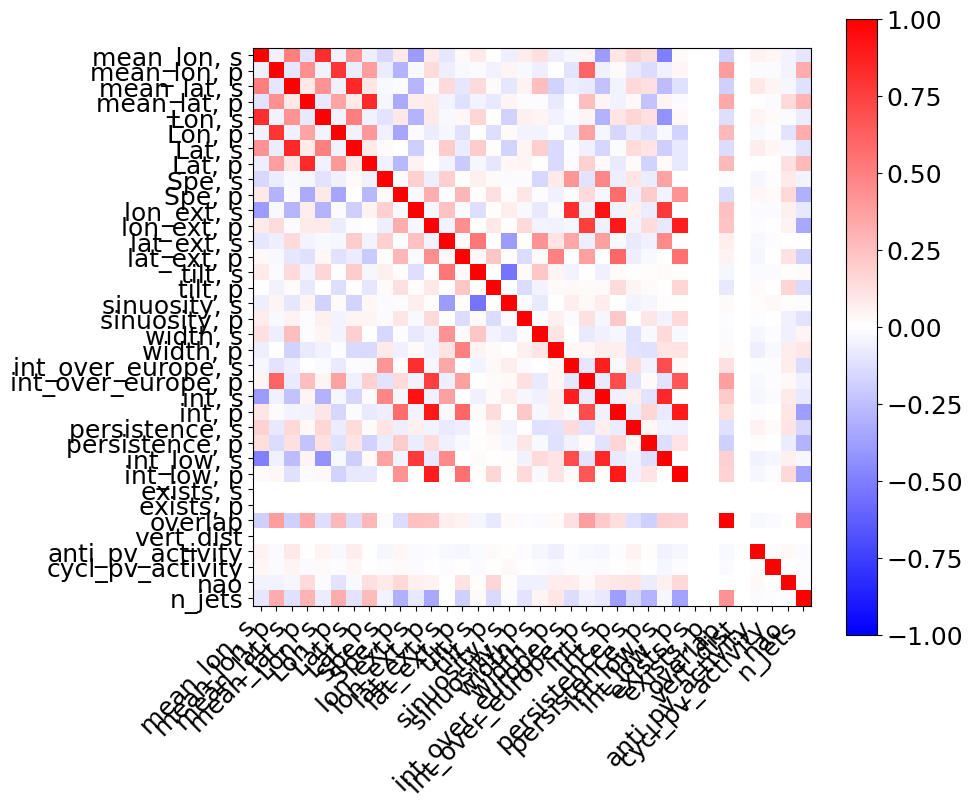

In [ ]:
to_concat = []
ticks = []
valids = props_as_ds_late["mean_lon"]
valids = (
    ~valids.sel(jet="polar").isnull() & ~valids.sel(jet="subtropical").isnull()
).values
for varname, da in props_as_ds_late.items():
    if varname not in [
        "anti_pv_activity",
        "cycl_pv_activity",
        "overlap",
        "vert_dist",
        "n_jets",
        "nao",
    ]:
        for jet in da.jet.values:
            to_concat.append(da.sel(jet=jet).values[valids])
            ticks.append(f"{varname}, {jet[0]}")
    else:
        to_concat.append(np.roll(da.values[valids], 0))
        ticks.append(varname)
fig, ax = plt.subplots(figsize=(9, 8))
im = plt.imshow(np.corrcoef(np.stack(to_concat)), vmin=-1, vmax=1, cmap="bwr")
plt.colorbar(im)
ax.set_yticks(np.arange(0, len(ticks)), ticks)
_ = ax.set_xticks(np.arange(0, len(ticks)), ticks, rotation=45, ha="right")
fig.savefig(f"{FIGURES}/jet_props_misc/jet_props_corr_full.png")

## Overlaps vs absolute lon / lat

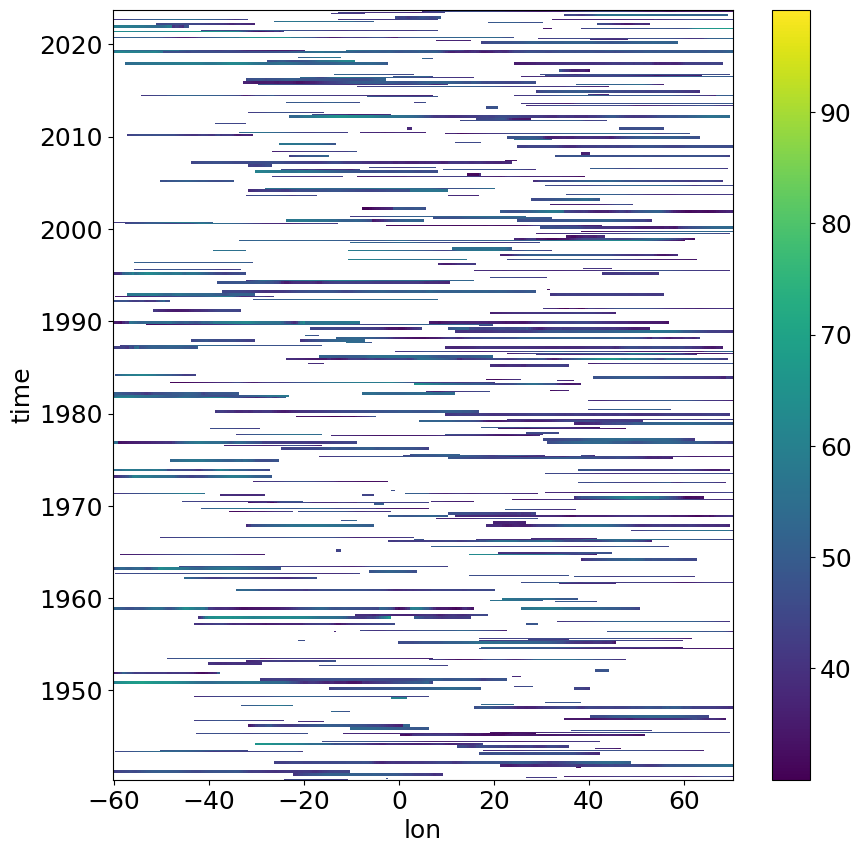

In [ ]:
da_overlaps.plot(figsize=(10, 10))

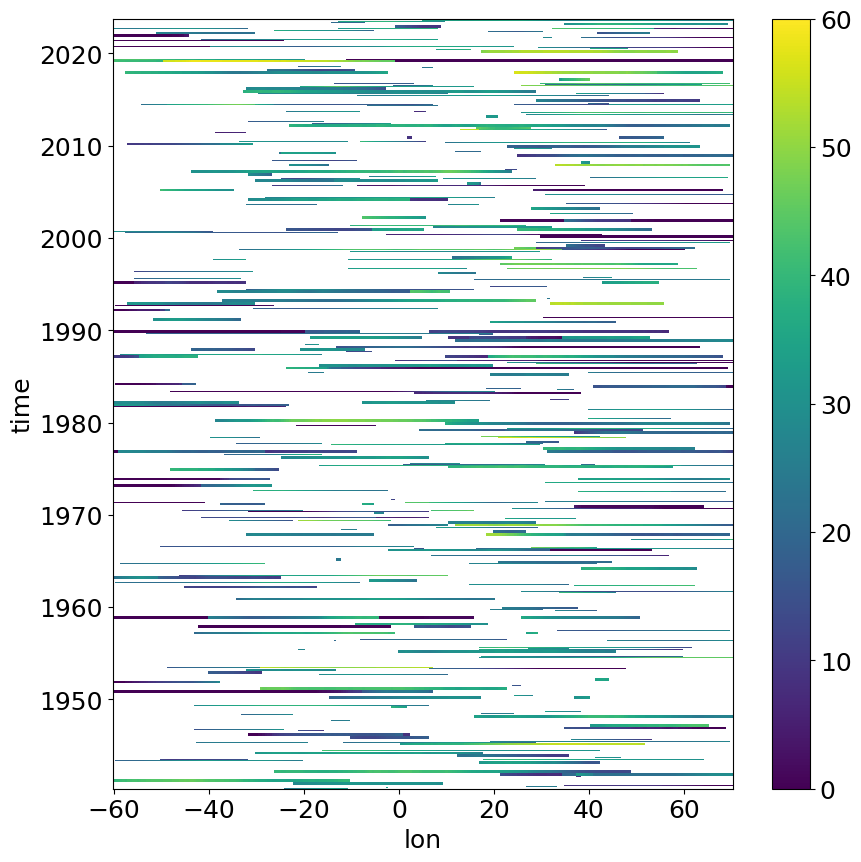

In [ ]:
da_vert_dists.plot(figsize=(10, 10))

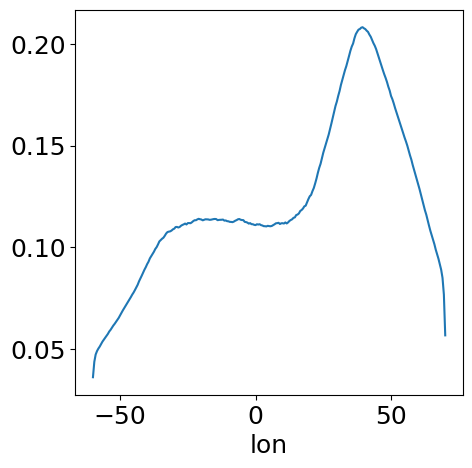

In [ ]:
(da_overlaps > 0).mean(dim="time").plot(figsize=(5, 5))

## Seasonal variability ?

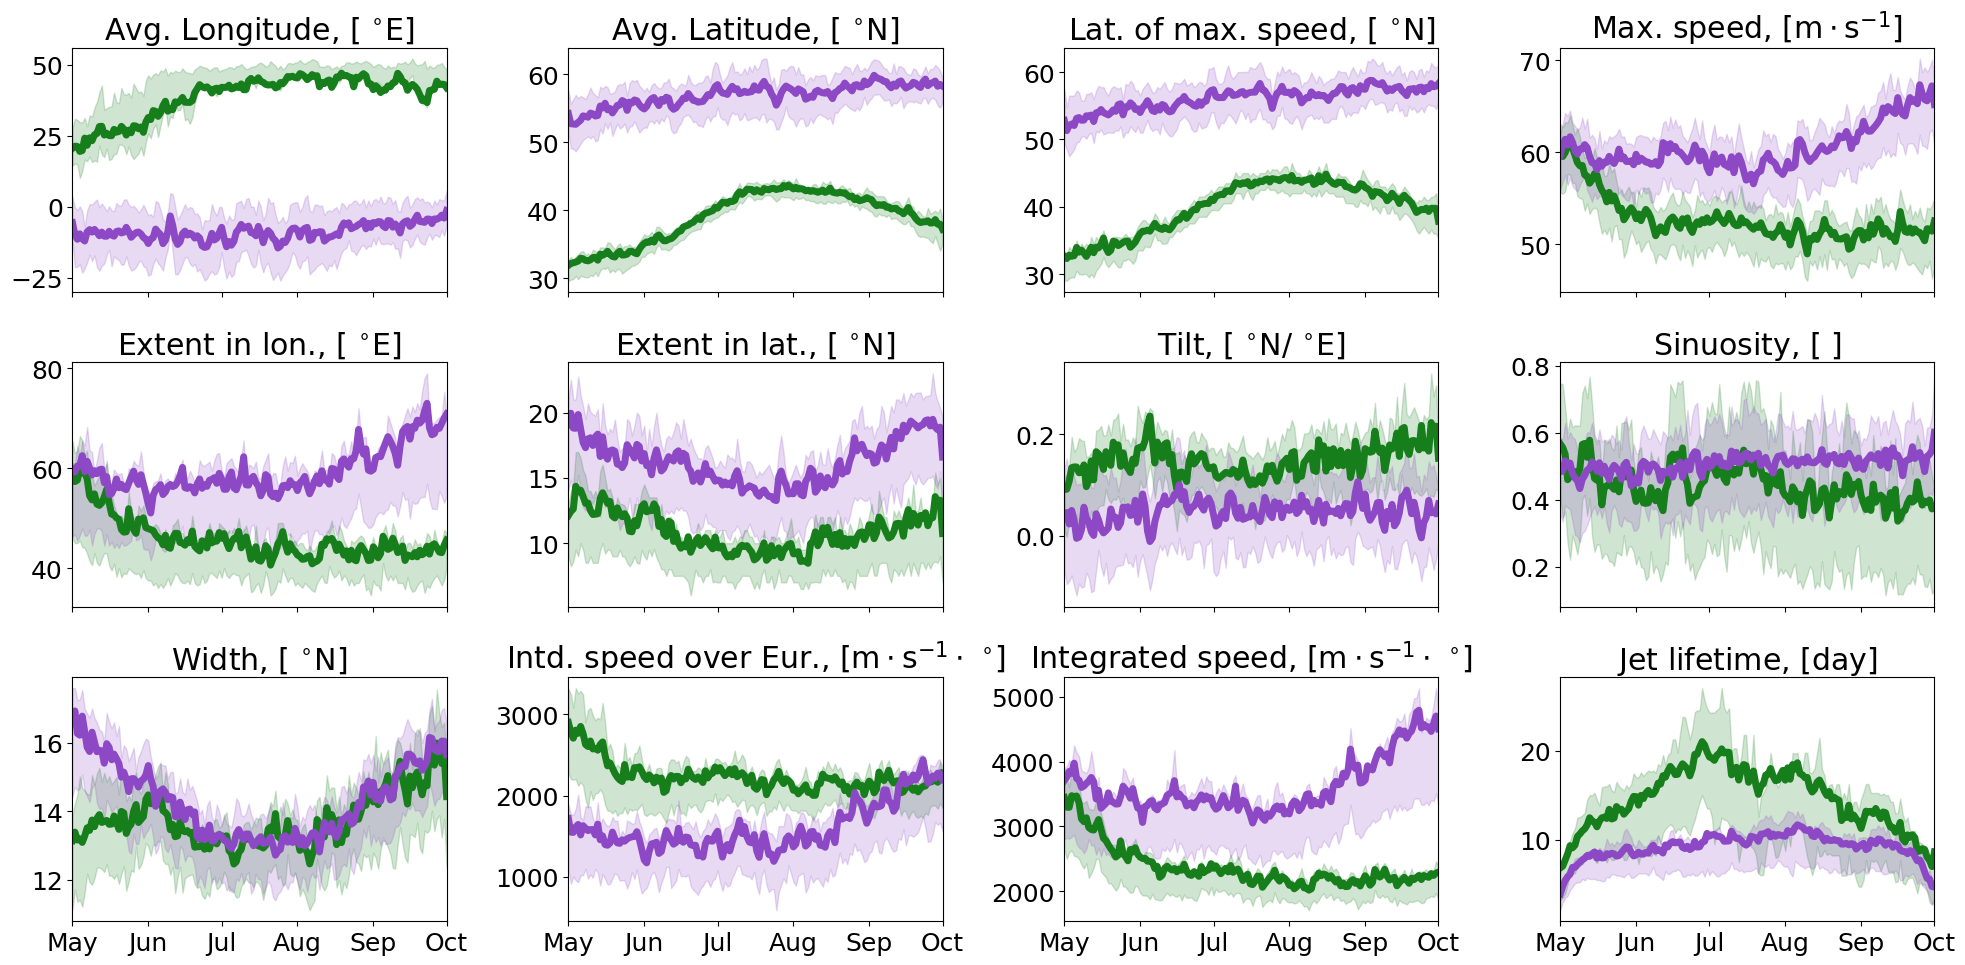

In [ ]:
from matplotlib.dates import DateFormatter

data_vars = [
    varname
    for varname in props_as_ds.data_vars
    if varname not in ["int_low", "is_polar", "Lon"]
]
fig, axes = plt.subplots(3, 4, figsize=(20, 10), tight_layout=True, sharex="all")
for varname, ax in zip(data_vars, axes.ravel()):
    gb = props_as_ds[varname].groupby("time.dayofyear")
    x = list(gb.groups.keys())
    x = DATERANGEPL_EXT[x]
    ys = gb.mean().values
    qs = gb.quantile(q=[0.33, 0.66]).values
    for i in range(2):
        ax.fill_between(x, qs[:, i, 0], qs[:, i, 1], color=COLORS5[i], alpha=0.2)
        ax.plot(x, ys[:, i], lw=5, color=COLORS5[i])
    ax.set_title(f"{PRETTIER_VARNAME[varname]}, [{UNITS[varname]}]")
    ax.xaxis.set_major_formatter(DateFormatter("%b"))
    ax.set_xlim(min(x), max(x))
plt.savefig(f"{FIGURES}/jet_props_misc/jet_props_seasonal.png")

# Demo: double anim

In [ ]:
r1 = len(da_s.lon) / len(da_s.lat)
r2 = 1
height = 4
wspace = 0.04
cbar_size = 0.05
fig = plt.figure(
    figsize=(height * (r1 + r2 + 2 * cbar_size + 3 * wspace), height), dpi=90
)
gs = GridSpec(
    1,
    5,
    width_ratios=(r1, cbar_size, 4 * wspace, r2, cbar_size),
    wspace=0.02,
    figure=fig,
)

fig.add_subplot(gs[2], visible=False)
ax_contourf = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())
ax_contourf.set_extent(
    exp_s.region,
    crs=ccrs.PlateCarree(),
)
ax_contourf.add_feature(COASTLINE)
cs = ax_contourf.contourf(
    da_s.lon.values, da_s.lat.values, da_s[tsteps[0]].values, **kwargs_contourf
)
cax = fig.add_subplot(gs[1])
fig.colorbar(cs, cax=cax)

ax_trajectory = fig.add_subplot(gs[3])
# ax_trajectory.plot([1, 2])
kwargs_trajectory = dict(
    cmap=mpl.colormaps["gray_r"], norm=Normalize(np.amin(thesepops), np.amax(thesepops))
)
xlims = [
    np.amin(coords[~outermask][:, 0]) - 0.8,
    np.amax(coords[~outermask][:, 0]) + 0.8,
]
ylims = [np.amin(coords[~outermask][:, 1]) - 1, np.amax(coords[~outermask][:, 1]) + 1]
fig, ax_trajectory = splots.plot_map(
    coords,
    populations,
    "hexagons",
    draw_cbar=False,
    show=False,
    edgecolors="black",
    cmap="Greys",
    alphas=alphas,
    linewidths=0,
    fig=fig,
    ax=ax_trajectory,
)
cax = fig.add_axes([0.67, 0.84, 0.06, 0.04])
im = ScalarMappable(**kwargs_trajectory)
fig.colorbar(im, cax=cax, orientation="horizontal", ticks=[])
cax.text(-5, 0.35, "0", ha="center", va="center")
max_pop = np.amax(populations)
cax.text(max_pop + 9, 0.35, f"{max_pop}", ha="center", va="center")

lc = LineCollection(segments, cmap="magma", norm=norm)
lc.set_array(np.repeat(np.arange(len(traj) - 1), repeats=reps))
lc.set_linewidth(3)
lc = ax_trajectory.add_collection(lc)
cax = fig.add_subplot(gs[4])
cbar = fig.colorbar(lc, label=f"Days of summer {YEARSPL[yearidx]}", cax=cax)
list_of_days = np.asarray([0, 14 * 4, 30 * 4, 44 * 4, 61 * 4, 75 * 4, 91 * 4 + 3])

pretty_list_of_days = (
    da.time[yearidx * 92 * 4 + list_of_days].dt.strftime("%b %d").values
)
cbar.ax.set_yticks(list_of_days, labels=pretty_list_of_days)
cbar.ax.invert_yaxis()
ax_trajectory.set_xlim(xlims)
ax_trajectory.set_ylim(ylims)

jets = all_jets[tsteps[0]]
lines = []
for j in range(3):
    try:
        jet = jets[j]
        x, y, s = jet.T
        p = np.polyfit(x, y, w=s, deg=3, full=False)
        p = np.poly1d(p)
        newy = p(x)
    except IndexError:
        x, newy, s = [], [], []

    lines.append(ax_contourf.plot(x, newy, color="dimgray", lw=4)[0])


def animate(i):
    global cs
    global lines
    global lc
    for c in cs.collections:
        c.remove()
    cs = ax_contourf.contourf(
        da_s.lon.values, da_s.lat.values, da_s[tsteps[i]].values, **kwargs_contourf
    )
    jets = all_jets[tsteps[i]]
    for j in range(3):
        try:
            jet = jets[j]
            x, y, s = jet.T
        except IndexError:
            x, y, s = [], [], []
        lines[j].set_data(x, y)
    if i > 1:
        to_be_set_visible = np.sum(reps[:i])
        lws = np.zeros(len(segments))
        lws[:to_be_set_visible] = 4
        lc.set_lw(lws)
    else:
        lc.set_lw(0.0)
    fig.suptitle(titles[i])
    return cs, lines, lc


ani = FuncAnimation(fig, animate, frames=np.arange(len(tsteps)))
ani.save("Figures/double_anim.gif", dpi=200, fps=5)

# Demo: simple anim

MovieWriter ffmpeg unavailable; using Pillow instead.


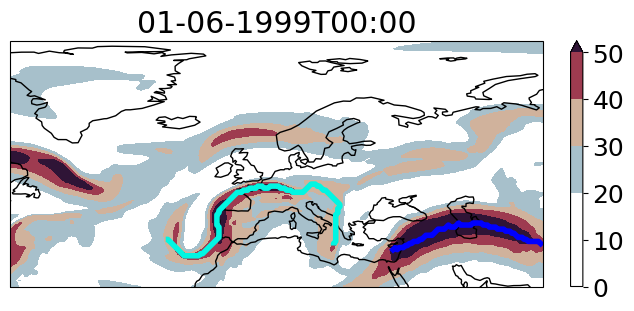

In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.animation import FuncAnimation

clu = Clusterplot(1, 1, exp_s.region)
fig = clu.fig
ax = clu.axes[0]
year = 1999
times = da_s.time
mask = ((times.dt.season == "JJA") & (times.dt.year == year)).values
indices = np.where(mask)[0]
jets = all_jets[indices[0] : indices[-1]]  # janky
times = times[mask]
flags_ = flags.loc[times].values
minflag, maxflax = flags_.min(), flags_[flags_ < 13000].max()
COLORS = colormaps.BlAqGrYeOrReVi200(np.linspace(0, 1, maxflax - minflag + 1))
flags_ -= minflag
kwargs_contourf, _, _, _ = clu.setup_contourf(
    [da_s.loc[times[0]]], transparify=2, q=0.95
)
lines = []
for jet in jets[0]:
    lines.append(jet[:, :2])
lc = LineCollection(lines, lw=4)
cs = ax.contourf(
    da_s.lon.values, da_s.lat.values, da_s.loc[times[0]].values, **kwargs_contourf
)
ax.add_collection(lc)
cbar = fig.colorbar(cs, ax=ax)


def animate(i):
    global lc
    global cs
    for c in cs.collections:
        c.remove()
    lines = []
    colors = []
    for jet, flag in zip(jets[i], flags_[i]):
        lines.append(jet[:, :2])
        colors.append(COLORS[flag])
    lc.set_segments(lines)
    lc.set_colors(colors)
    cs = ax.contourf(
        da_s.lon.values, da_s.lat.values, da_s.loc[times[i]].values, **kwargs_contourf
    )
    ax.set_title(times[i].dt.strftime("%d-%m-%YT%H:00").item())
    return lc, cs


ani = FuncAnimation(fig, animate, frames=len(times) - 1)
# ani = FuncAnimation(fig, animate, frames=3)
ani.save("Figures/jet_anim.gif", dpi=200, fps=2)

In [ ]:
times[0].dt.strftime("%d-%m-%YT%H:00").item()

'01-06-1999T00:00'